In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import json
import re
from dfpvizpy.dfpvizpy import dfpSave

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
sns.set(style="ticks", context='talk')
sns.set_palette('colorblind')

In [44]:
# reading in the data to a dataframe
df = pd.read_csv('DFP_WTHH_release.csv', index_col=0)
# this is the .json file with all of the questions and coding of the variables
with open('dfp_survey_questions.json', 'r') as fp:
    polling_info = json.load(fp)

Fixing some of the column data

In [45]:
# there are two values that need to be moved into the "employ" column
df.loc[2939]['employ'] = 6
df.loc[3110]['employ'] = 9
df.drop(columns='job', inplace=True)
df.drop(columns='weight_DFP', inplace=True)
df.fillna('?', inplace=True)

In [36]:
# these are columns which are the string 'other' responses
others = ['race_t', 'senvote18_t', 'senvote18_undecided_t', 'specsenvote18_t', 'specsenvote18_undecided_t',
          'housevote18_t', 'housevote18_undecided_t', 'govvote18_t', 'govvote18_undecided_t', 'NONVOTE_WHY_t',
          'pp18_polactions_txt', 'pid3_t', 'presvote16post_t', 'e14_presvote12_t', 'religpew_t']

In [7]:
# saving counts to a text file
with open('polling_counts.txt', 'w') as f:
    for column in df.columns:
        if column in df.columns and column in polling_info.keys() and column not in others:
            f.write(column + ' | ' + polling_info[column]["question"] + '\n\n')
            f.write("*-" * 40 + '\n\n')
            f.write(df[column].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info[column]).value_counts().to_string())
            f.write('\n\n\n')

In [6]:
#for column in df.columns:
#    if column in df.columns and column in polling_info.keys() and column not in others:
#        print(column + ' | ' + start + polling_info[column]["question"] + end)
#        print("*-" * 40)
#        print(df[column].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info[column]).value_counts().to_string())
#        print()

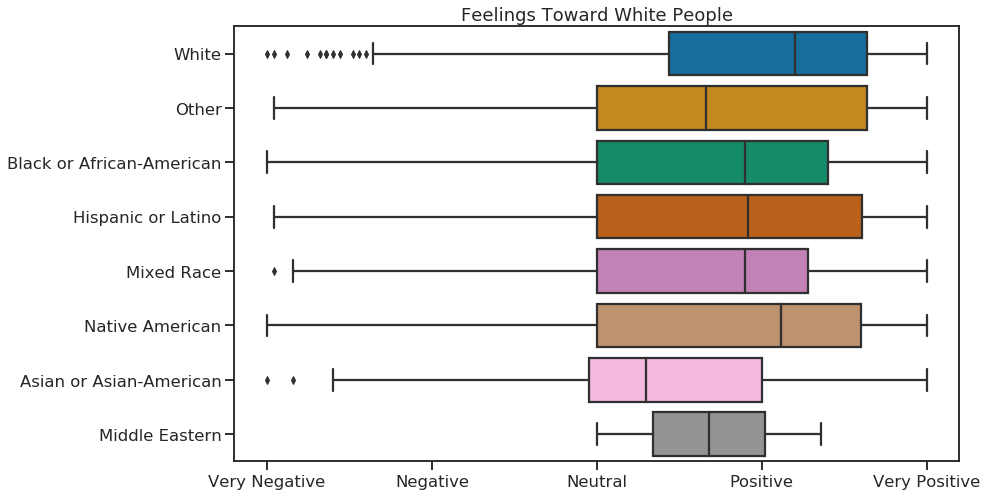

In [90]:
x_dat = df_new["race"].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info['race'])
f, ax = plt.subplots(figsize=(13, 8))
idx = df[df.FT_Blacks != '?']
df_new = idx[idx.FT_Whites != '?']
ax = sns.boxplot(y=x_dat, x=df_new["FT_Whites"].astype(float))
ax.set_ylabel('')
ax.set_title('Feelings Toward White People')
ax.set_xlabel('')
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive']) # , rotation=20)
plt.show()

In [79]:
polling_info['FT_Whites']['question']

'Whites Rate your feeling toward this group from zero (very cold or negative) to 100 (very warm or positive).'